In [167]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import VarianceThreshold

import sklearn

In [56]:
# read in test and train data

train_df = pd.read_csv("./data/train.csv")
test_df = pd.read_csv("./data/test.csv")

print("train data shape:", train_df.shape, "test data shape", test_df.shape)

train data shape: (1460, 81) test data shape (1459, 80)


In [57]:
print("Rows     : ", train_df.shape[0])
print("Columns  : ", train_df.shape[1])
print("Features : ", train_df.columns.tolist())
print("Missing values : ", train_df.isnull().sum().values.sum())
print("Unique values : ", train_df.nunique())
print("Test Data Shape : ", test_df.shape, "Train Data Shape", train_df.shape)

Rows     :  1460
Columns  :  81
Features :  ['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3Ss

In [45]:
# list the summary of all features
train_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [46]:
# remove duplicated data
train_df.duplicated(subset=None, keep="first")
print("Test", test_df.shape, "Train", train_df.shape)

Test (1459, 80) Train (1460, 81)


ValueError: could not convert string to float: 'RL'

Basement Features

In [2]:
basement_features = ["BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinSF1", "BsmtFinType2", "BsmtFinSF2", "BsmtUnfSF", "TotalBsmtSF"]

train_df[basement_features]

BsmtExposure = {
    "Gd" : 4, # Good Exposure
    "Av": 3,  # Average Exposure
    "Mn": 2,  # Mimimum Exposure
    "No": 1,  # No Exposure
    "NA": 0   # No Basement
}

BsmtFinType1 = {
    "GLQ" : 6, # GLQ	Good Living Quarters
    "ALQ": 5, # LQ	Average Living Quarters
    "BLQ": 4, # BLQ	Below Average Living Quarters
    "Rec": 3, # Rec	Average Rec Room
    "LwQ": 2, # LwQ	Low Quality
    "Unf": 1, # Unf	Unfinshed
    "NA": 0
}

BsmtFinType2 = {
    "GLQ" : 6, # GLQ	Good Living Quarters
    "ALQ": 5, # LQ	Average Living Quarters
    "BLQ": 4, # BLQ	Below Average Living Quarters
    "Rec": 3, # Rec	Average Rec Room
    "LwQ": 2, # LwQ	Low Quality
    "Unf": 1, # Unf	Unfinshed
    "NA": 0
}

BsmtCond = {
    #Ex	Excellent
    "Gd": 4,	# Good
    "TA": 3,	# Typical - slight dampness allowed
    "Fa": 2,	# Fair - dampness or some cracking or settling
    "Po": 1,    # Po	Poor - Severe cracking, settling, or wetness
    "NA": 0     # No Basement
}

BsmtQual = {
    "Ex":	5, # Excellent (100+ inches)
    "Gd":	4, # Good (90-99 inches)
    "TA":	3, # Typical (80-89 inches)
    "Fa":	2, # Fair (70-79 inches)
    "Po":	1, # Poor (<70 inches
    "NA":	0  # No basement
}

train_df.replace(
    {
        "BsmtQual": BsmtQual,
        "BsmtCond": BsmtCond,
        "BsmtFinType1": BsmtFinType1,
        "BsmtFinType2": BsmtFinType2,
        "BsmtExposure": BsmtExposure
    },
    inplace=True,
)
test_df.replace(
    {
        "BsmtQual": BsmtQual,
        "BsmtCond": BsmtCond,
        "BsmtFinType1": BsmtFinType1,
        "BsmtFinType2": BsmtFinType2,
        "BsmtExposure": BsmtExposure
    },
    inplace=True,
)

basement_features_df = train_df[basement_features]
plt.figure(figsize=(20, 20))
sns.heatmap(basement_features_df.corr())

NameError: name 'train_df' is not defined

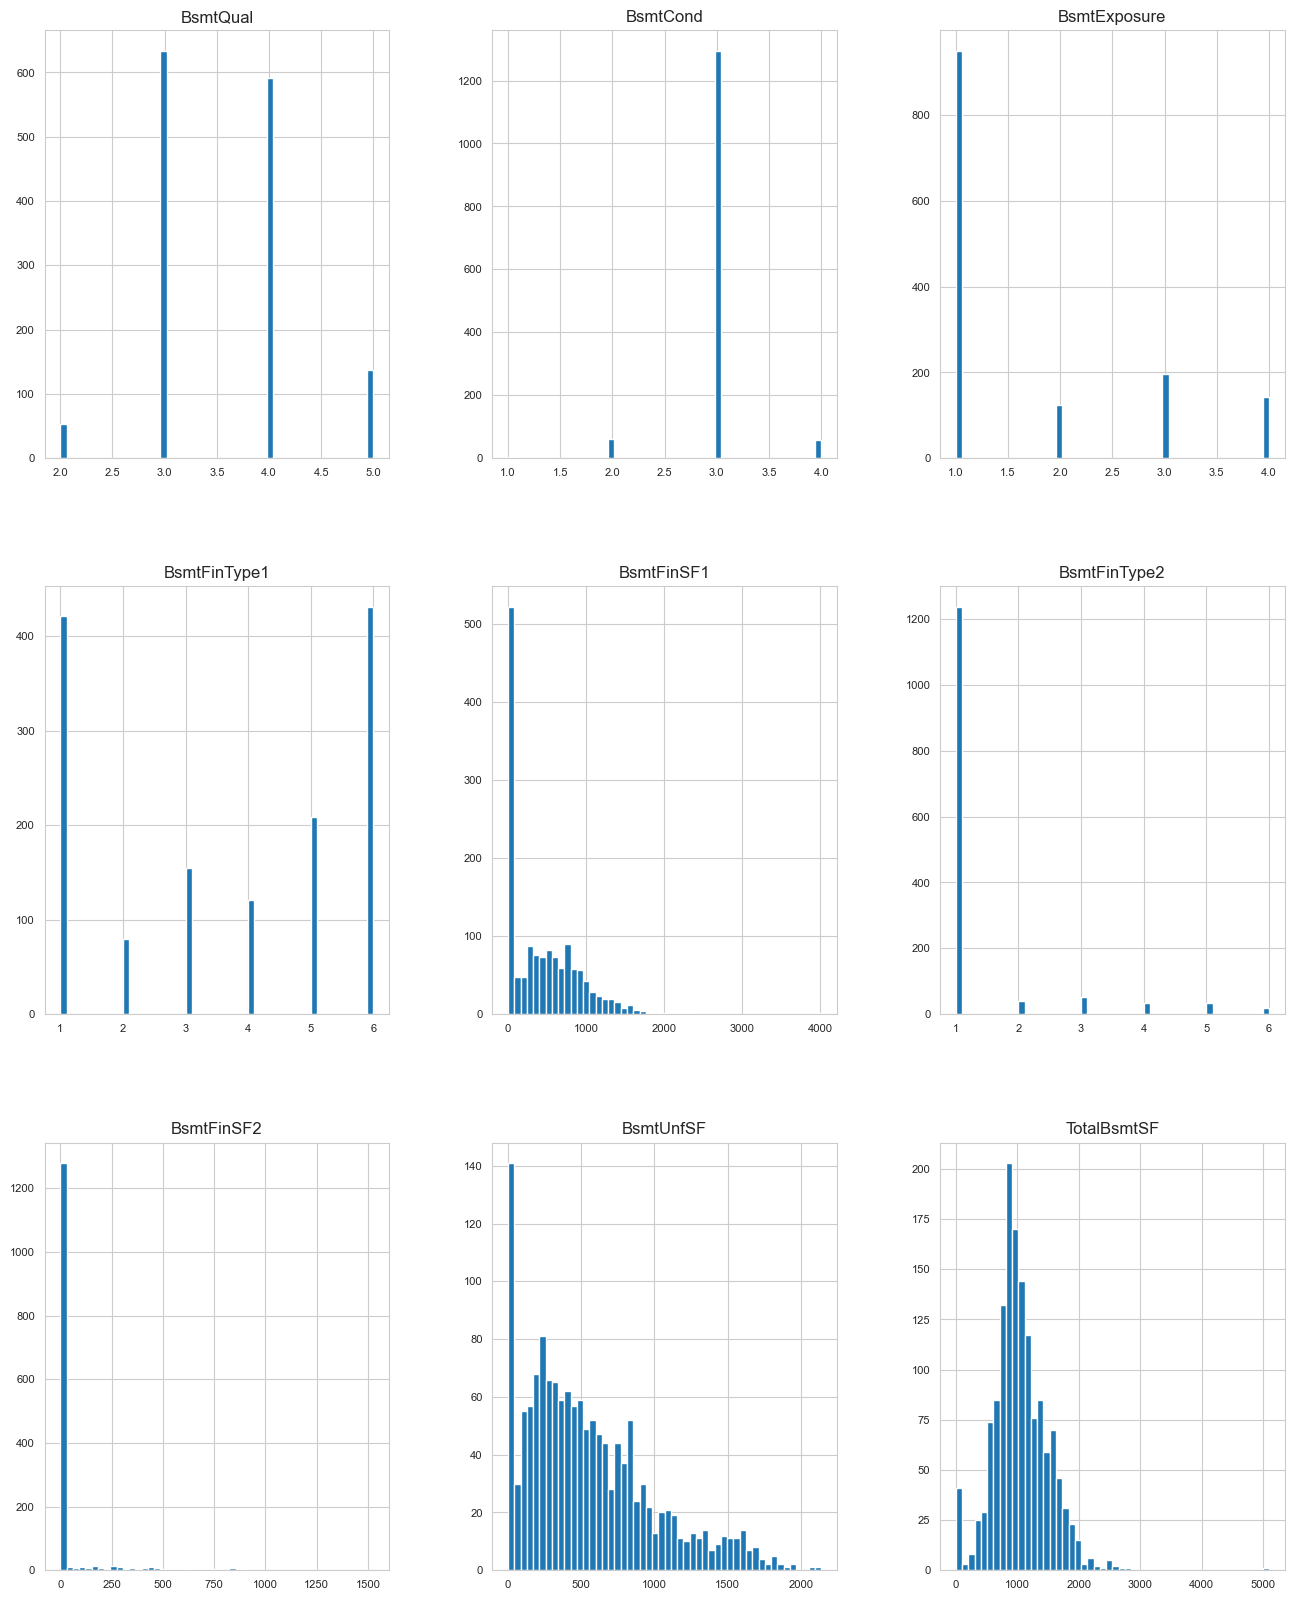

In [76]:
basement_features_df.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);


Garage Features

<Axes: >

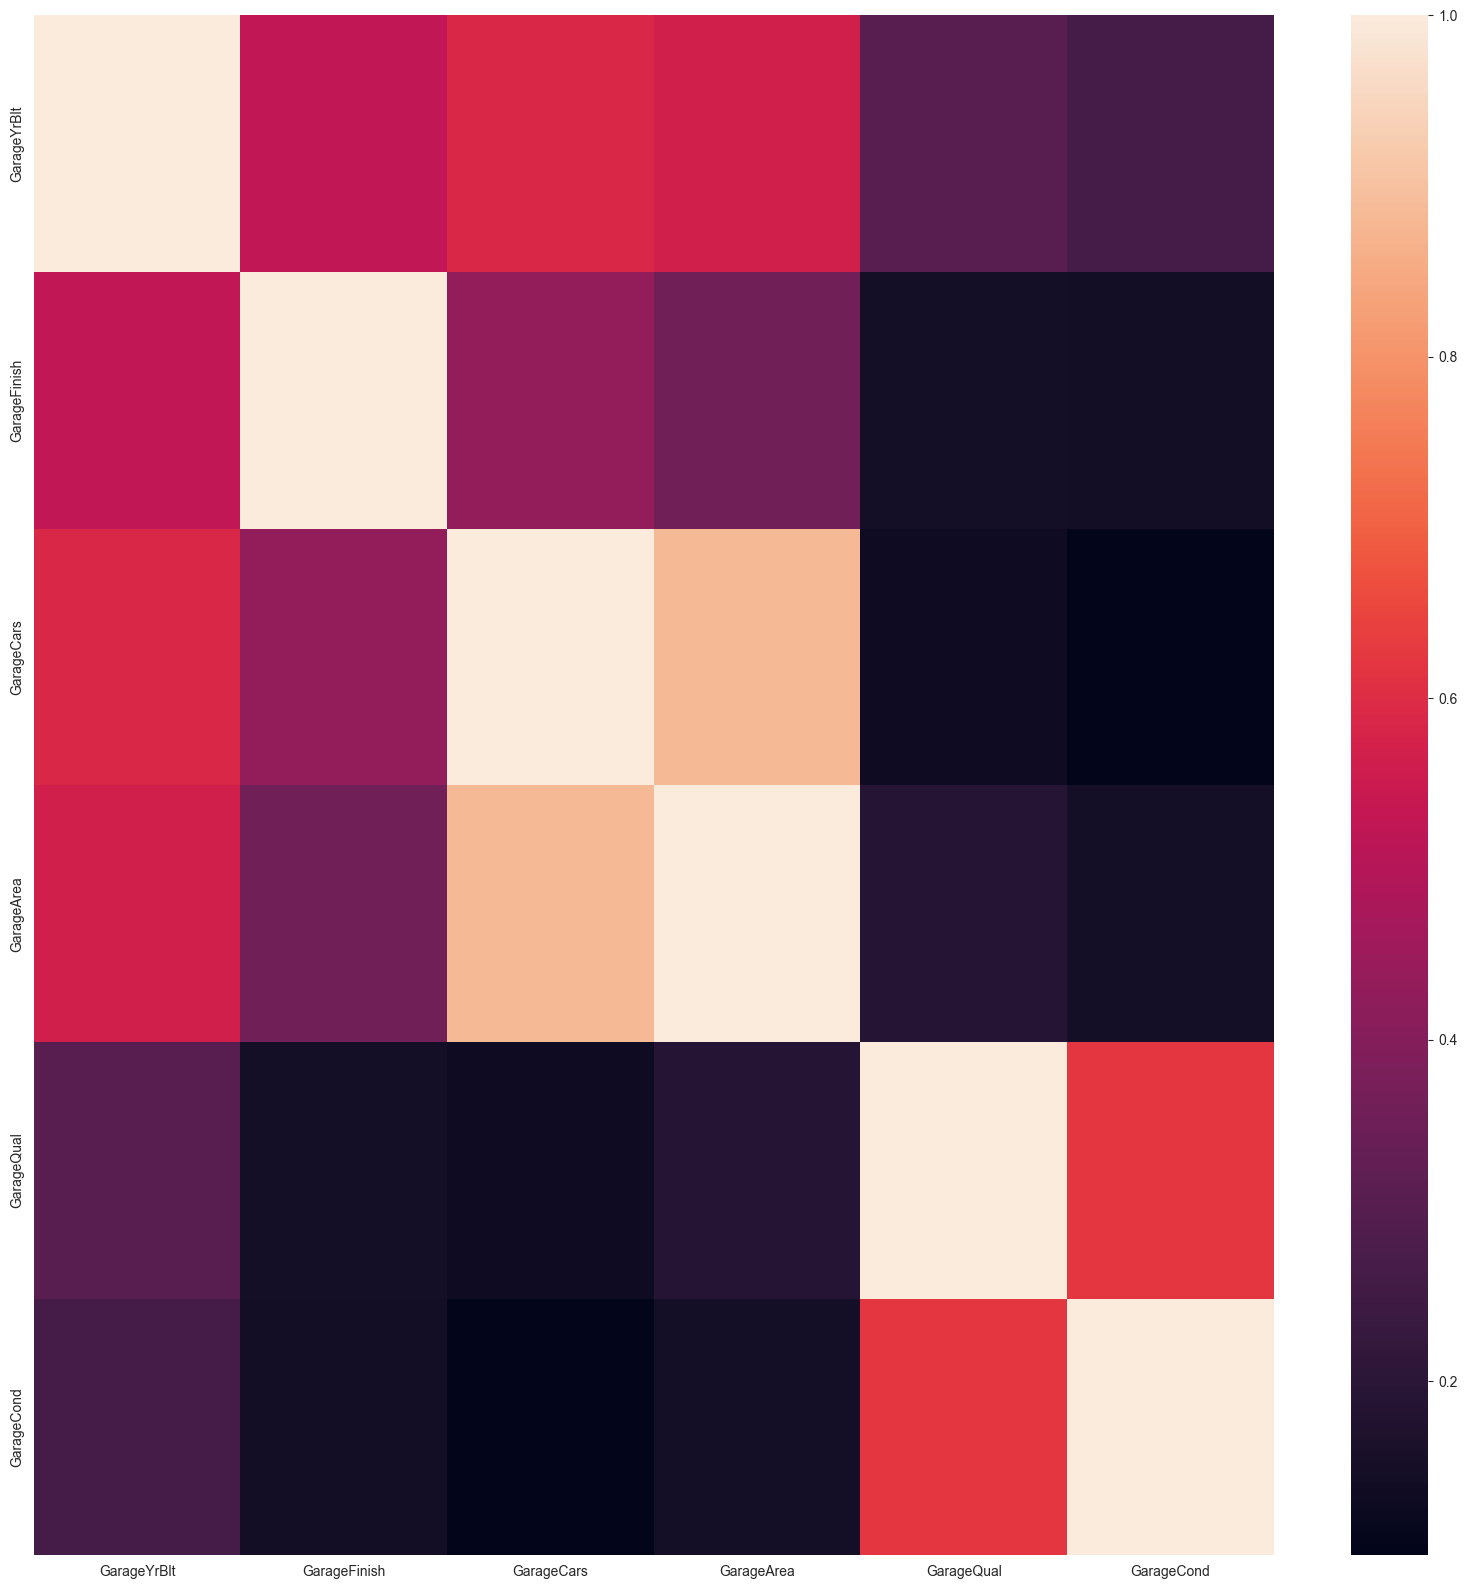

In [72]:
#GarageType: Garage location

    # 2Types	More than one type of garage
    # Attchd	Attached to home
    # Basment	Basement Garage
    # BuiltIn	Built-In (Garage part of house - typically has room above garage)
    # CarPort	Car Port
    # Detchd	Detached from home
    # NA	No Garage

# GarageYrBlt: Year garage was built
# GarageCars: Size of garage in car capacity
# GarageArea: Size of garage in square feet

GarageQual = {
    "Ex": 5, # Excellent
    "Gd": 4, # Good
    "TA": 3, # Typical/Average
    "Fa": 2, # Fair
    "Po": 1, # Poor
    "NA": 0  # No Garage
}
GarageCond = {
    "Ex": 5, #	Excellent,
    "Gd": 4, #	Good,
    "TA": 3, #	Typical/Average
    "Fa": 2, #  Fair
    "Po": 1, #  Poor
    "NA": 0  # No Garage
}

GarageFinish = {
    # Interior finish of the garage
    "Fin":	3, # Finished
    "RFn":	2, # Rough Finished
    "Unf":	1, # Unfinished
    "NA": 0,   # No Garage
}

garage_features = ["GarageYrBlt", "GarageFinish", "GarageCars", "GarageArea", "GarageQual", "GarageCond"]

train_df[garage_features]

train_df.replace(
    {
        "GarageFinish": GarageFinish,
        "GarageCond": GarageCond,
        "GarageQual": GarageQual
    },
    inplace=True,
)
test_df.replace(
    {
        "GarageFinish": GarageFinish,
        "GarageCond": GarageCond,
        "GarageQual": GarageQual
    },
    inplace=True,
)

train_df[garage_features]
garage_features_df = train_df[garage_features]
plt.figure(figsize=(20, 20))
sns.heatmap(garage_features_df.corr())


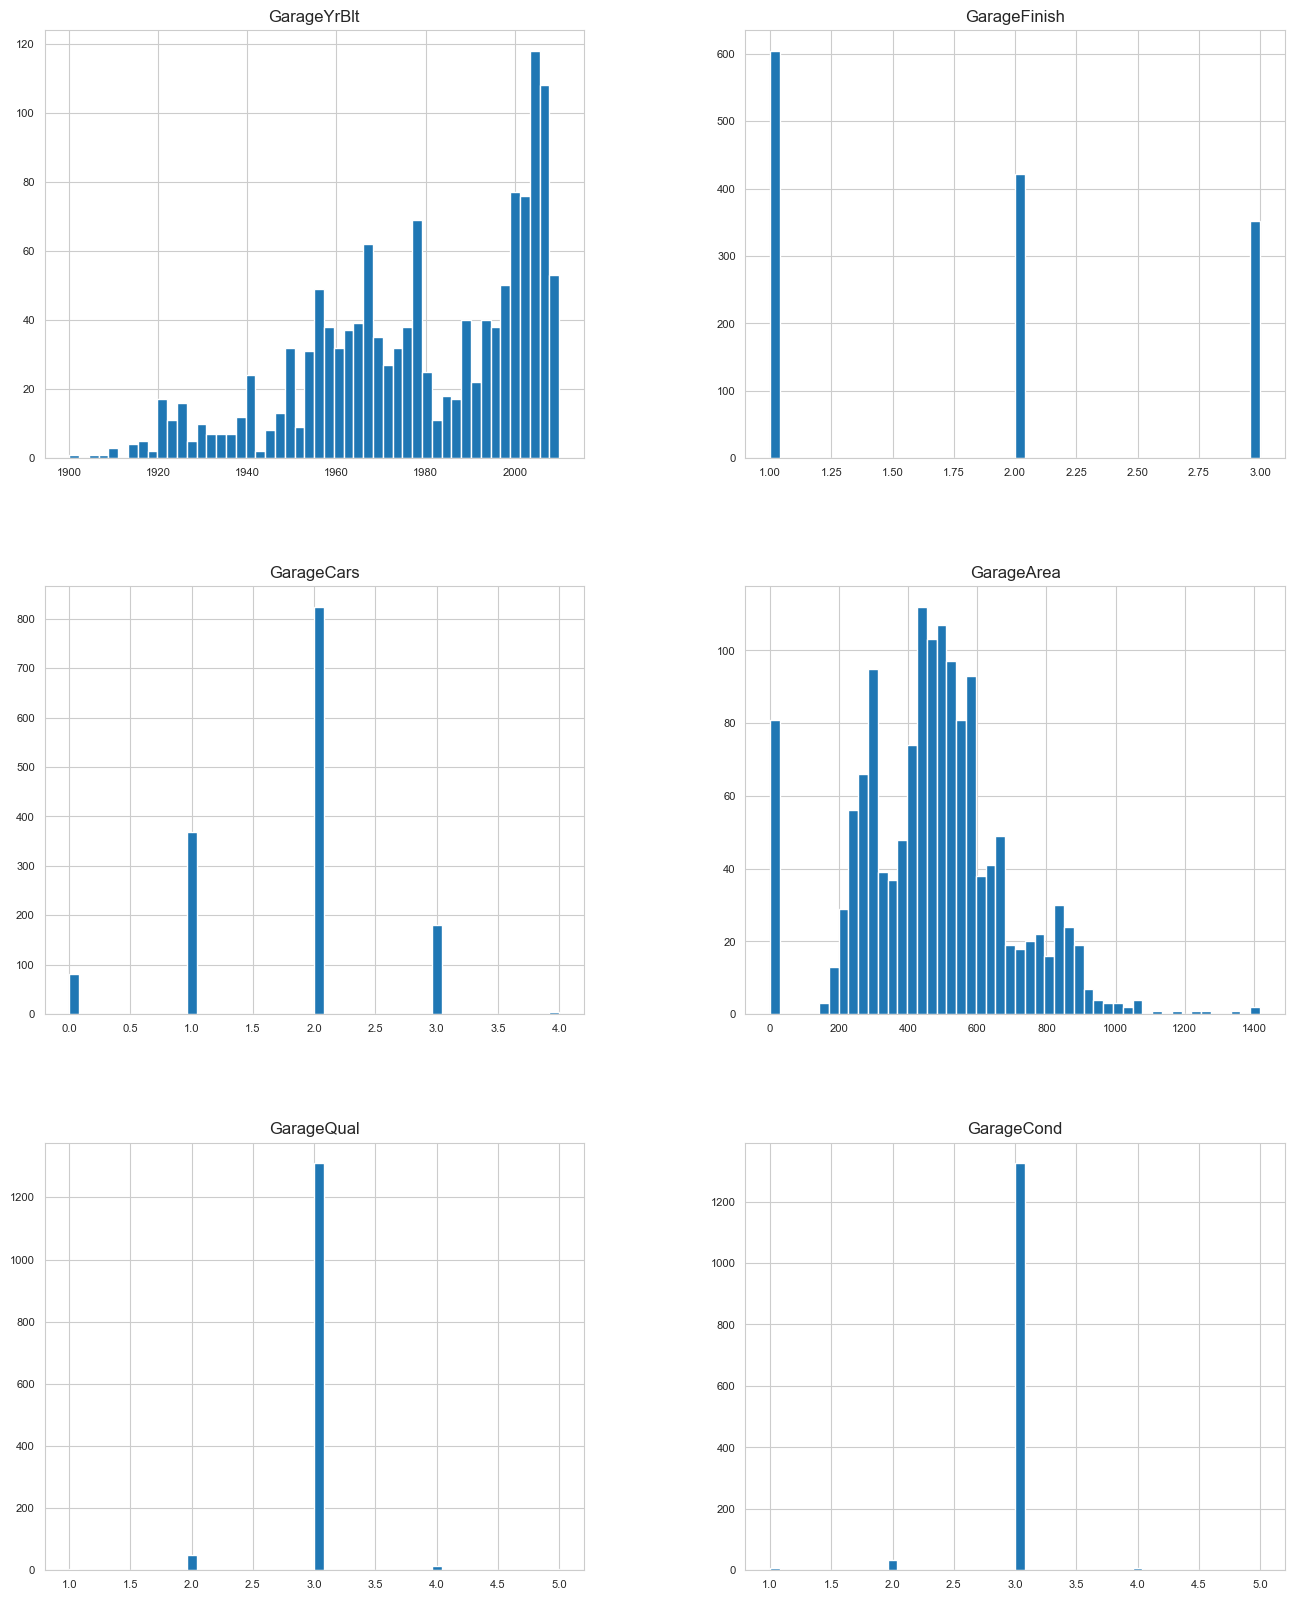

In [75]:
garage_features_df.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);


In [ ]:
garage_features_df

Porch Features

,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch
0,61,0,0,0
1,0,0,0,0
2,42,0,0,0
3,35,272,0,0
4,84,0,0,0
5,30,0,320,0
6,57,0,0,0
7,204,228,0,0
8,0,205,0,0
9,4,0,0,0


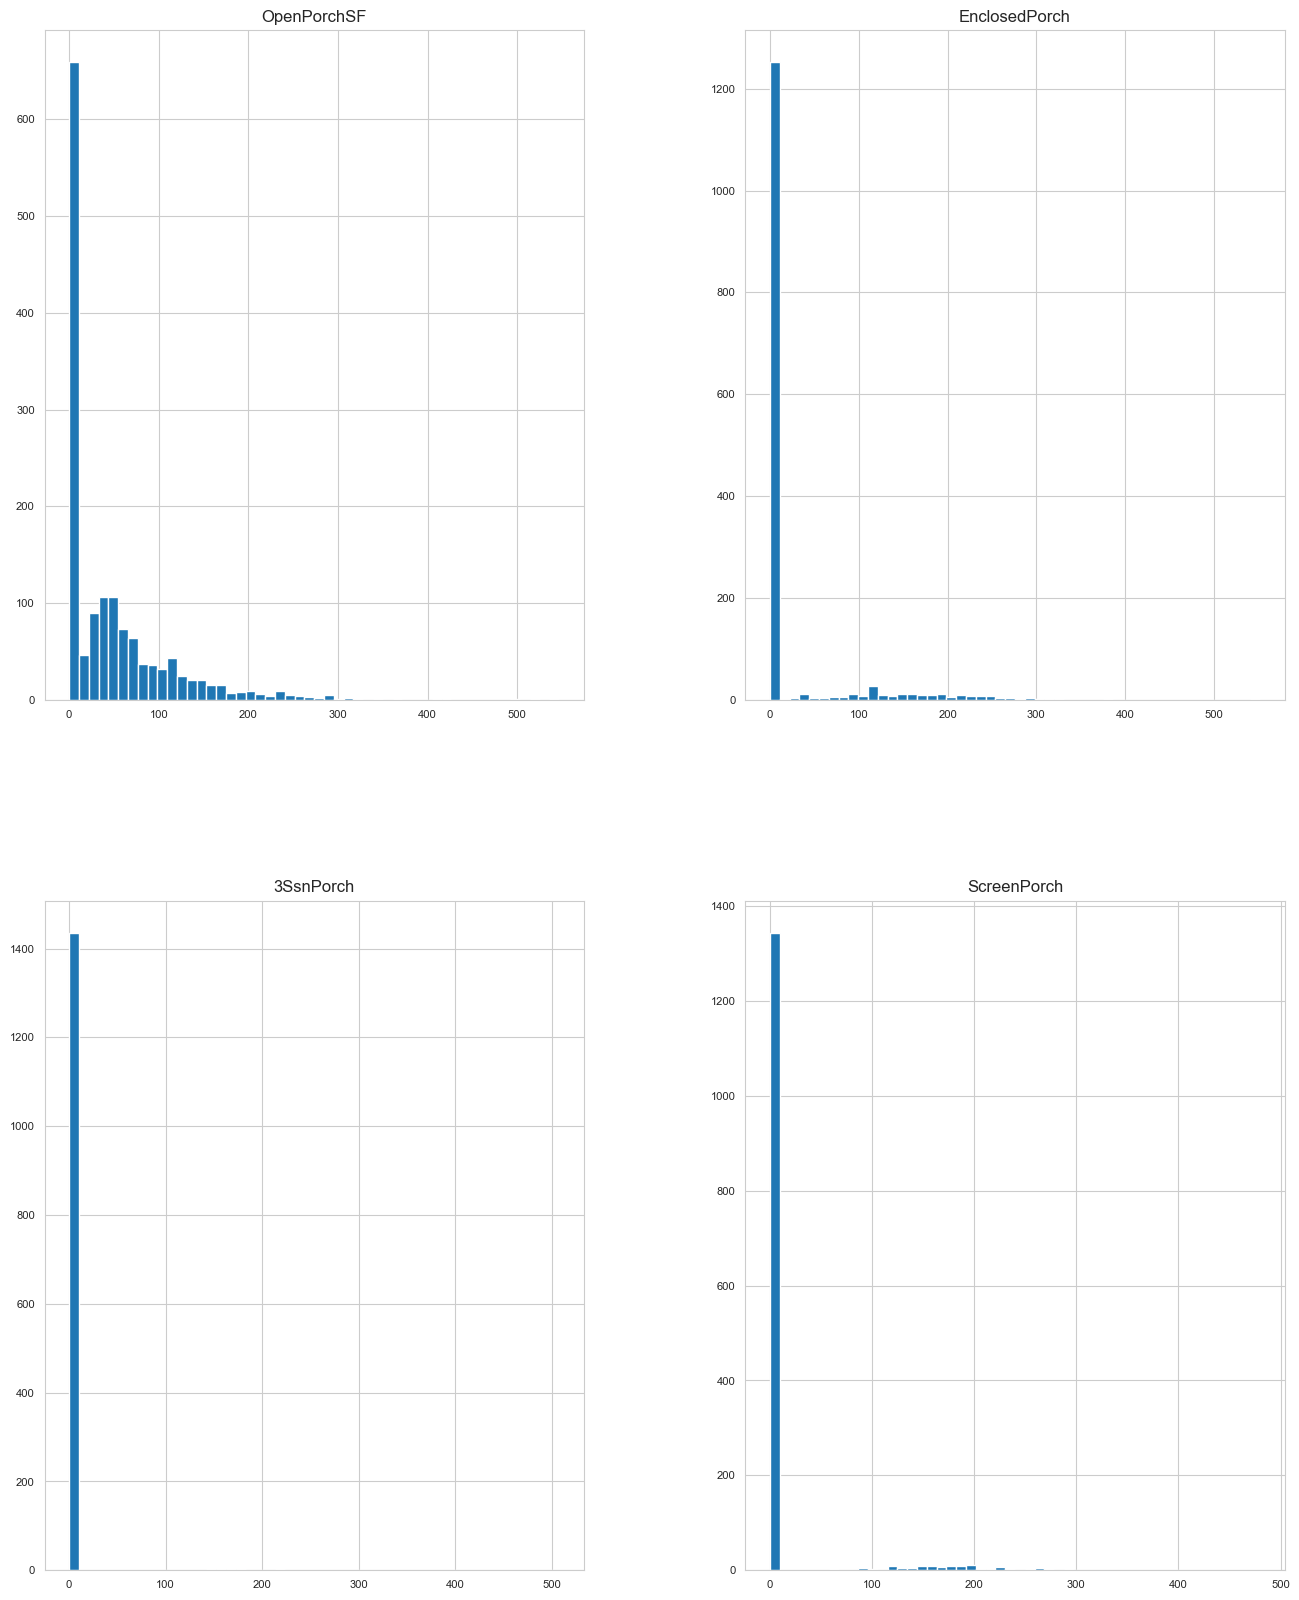

In [80]:
# OpenPorchSF: Open porch area in square feet
# EnclosedPorch: Enclosed porch area in square feet
# 3SsnPorch: Three season porch area in square feet
# ScreenPorch: Screen porch area in square feet

porch_features = ["OpenPorchSF", "EnclosedPorch", "3SsnPorch", "ScreenPorch"]

porch_features = train_df[porch_features]

porch_features.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);
porch_features


Location Features

In [1]:
# MSSubClass: The building class
# MSZoning: The general zoning classification

location_features = ["MSZoning"]
location_features_df = train_df[location_features]
# location_features_df.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);
train_df["MSZoning"].value_counts()
train_df["MSSubClass"].value_counts()


NameError: name 'train_df' is not defined

In [110]:
# LotFrontage: Linear feet of street connected to property
train_df["LotFrontage"].value_counts()
# LotArea: Lot size in square feet
train_df["LotArea"].value_counts()

# Street: Type of road access to property
train_df["Condition1"].value_counts()

# Grvl	Gravel: 1541
# Pave	Paved:C6

# Alley: Type of alley access to property

# Grvl	Gravel : 50
# Pave	Paved : 41
# NA 	No alley access

# LotShape: General shape of property

# IR1: 484
# IR2: 41
# IR3: 10
# Reg: 925

#

#LandContour: Flatness of the property

# Lvl	Near Flat/Level
# Bnk	Banked - Quick and significant rise from street grade to building
# HLS	Hillside - Significant slope from side to side
# Low	Depression

# Lvl,1311
# Bnk,63
# HLS,50
# Low,36


# LotConfig: Lot configuration

# Inside	Inside lot
# Corner	Corner lot
# CulDSac	Cul-de-sac
# FR2	Frontage on 2 sides of property
# FR3	Frontage on 3 sides of property

# LandSlope: Slope of property

# Gtl	Gentle slope
# Mod	Moderate Slope
# Sev	Severe Slope

# Inside,1052
# Corner,263
# CulDSac,94
# FR2,47
# FR3,4

# Utilities: Type of utilities available

# AllPub	All public Utilities (E,G,W,& S)
# NoSewr	Electricity, Gas, and Water (Septic Tank)
# NoSeWa	Electricity and Gas Only
# ELO	Electricity only
# AllPub,1459
# NoSeWa,

# LandSlope: Slope of property

# Gtl	Gentle slope
# Mod	Moderate Slope
# Sev	Severe Slope

# Gtl,1382
# Mod,65
# Sev,13





Condition1
Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: count, dtype: int64

In [178]:
# Select categorical columns for encoding
categorical_columns = train_df.select_dtypes(include='object').columns

# Perform one-hot encoding
encoded_data = pd.get_dummies(train_df, columns=categorical_columns)

encoded_data

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtQual,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,4.0,...,False,False,False,True,False,False,False,False,True,False
1,2,20,80.0,9600,6,8,1976,1976,0.0,4.0,...,False,False,False,True,False,False,False,False,True,False
2,3,60,68.0,11250,7,5,2001,2002,162.0,4.0,...,False,False,False,True,False,False,False,False,True,False
3,4,70,60.0,9550,7,5,1915,1970,0.0,3.0,...,False,False,False,True,True,False,False,False,False,False
4,5,60,84.0,14260,8,5,2000,2000,350.0,4.0,...,False,False,False,True,False,False,False,False,True,False
5,6,50,85.0,14115,5,5,1993,1995,0.0,4.0,...,False,False,False,True,False,False,False,False,True,False
6,7,20,75.0,10084,8,5,2004,2005,186.0,5.0,...,False,False,False,True,False,False,False,False,True,False
7,8,60,NaN,10382,7,6,1973,1973,240.0,4.0,...,False,False,False,True,False,False,False,False,True,False
8,9,50,51.0,6120,7,5,1931,1950,0.0,3.0,...,False,False,False,True,True,False,False,False,False,False
9,10,190,50.0,7420,5,6,1939,1950,0.0,3.0,...,False,False,False,True,False,False,False,False,True,False


In [118]:
# train_df["Condition1"].value_counts()

# Condition1: Proximity to various conditions

# Artery	Adjacent to arterial street
# Feedr	Adjacent to feeder street
# Norm	Normal
# RRNn	Within 200' of North-South Railroad
# RRAn	Adjacent to North-South Railroad
# PosN	Near positive off-site feature--park, greenbelt, etc.
# PosA	Adjacent to postive off-site feature
# RRNe	Within 200' of East-West Railroad
# RRAe	Adjacent to East-West Railroad

train_df["Condition1"].value_counts()

# Norm,1260
# Feedr,81
# Artery,48
# RRAn,26
# PosN,19
# RRAe,11
# PosA,8
# RRNn,5
# RRNe,2


# Condition2: Proximity to various conditions (if more than one is present)

train_df["Condition2"].value_counts()


# Artery	Adjacent to arterial street
# Feedr	Adjacent to feeder street
# Norm	Normal
# RRNn	Within 200' of North-South Railroad
# RRAn	Adjacent to North-South Railroad
# PosN	Near positive off-site feature--park, greenbelt, etc.
# PosA	Adjacent to postive off-site feature
# RRNe	Within 200' of East-West Railroad
# RRAe	Adjacent to East-West Railroad

# Norm,1445
# Feedr,6
# Artery,2
# RRNn,2
# PosN,2
# PosA,1
# RRAn,1
# RRAe,1


# BldgType: Type of dwelling

train_df["BldgType"].value_counts()

# 1Fam	Single-family Detached
# 2FmCon	Two-family Conversion; originally built as one-family dwelling
# Duplx	Duplex
# TwnhsE	Townhouse End Unit
# TwnhsI	Townhouse Inside Unit

# 1Fam,1220
# TwnhsE,114
# Duplex,52
# Twnhs,43
# 2fmCon,31

# HouseStyle: Style of dwelling
train_df["HouseStyle"].value_counts()

# 1Story	One story
# 1.5Fin	One and one-half story: 2nd level finished
# 1.5Unf	One and one-half story: 2nd level unfinished
# 2Story	Two story
# 2.5Fin	Two and one-half story: 2nd level finished
# 2.5Unf	Two and one-half story: 2nd level unfinished
# SFoyer	Split Foyer
# SLvl	Split Level

# 1Story,726
# 2Story,445
# 1.5Fin,154
# SLvl,65
# SFoyer,37
# 1.5Unf,14
# 2.5Unf,11
# 2.5Fin,8

# OverallQual: Rates the overall material and finish of the house
train_df["OverallQual"].value_counts()

# 10	Very Excellent
# 9	Excellent
# 8	Very Good
# 7	Good
# 6	Above Average
# 5	Average
# 4	Below Average
# 3	Fair
# 2	Poor
# 1	Very Poor


# 5,397
# 6,374
# 7,319
# 8,168
# 4,116
# 9,43
# 3,20
# 10,18
# 2,3
# 1,2

# OverallCond: Rates the overall condition of the house

train_df["OverallCond"].value_counts()

# 10	Very Excellent
# 9	Excellent
# 8	Very Good
# 7	Good
# 6	Above Average
# 5	Average
# 4	Below Average
# 3	Fair
# 2	Poor
# 1	Very Poor

# 5,821
# 6,252
# 7,205
# 8,72
# 4,57
# 3,25
# 9,22
# 2,5
# 1,1


OverallCond
5    821
6    252
7    205
8     72
4     57
3     25
9     22
2      5
1      1
Name: count, dtype: int64

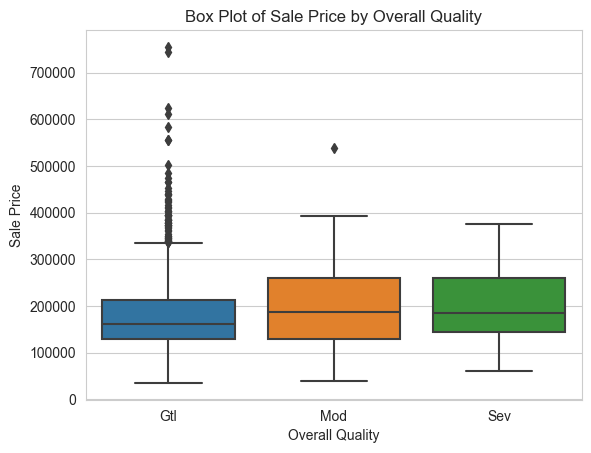

In [182]:
sns.boxplot(x=train_df['OverallQual'], y=train_df['SalePrice'])
plt.xlabel('Overall Quality')
plt.ylabel('Sale Price')
plt.title('Box Plot of Sale Price by Overall Quality')
plt.show()

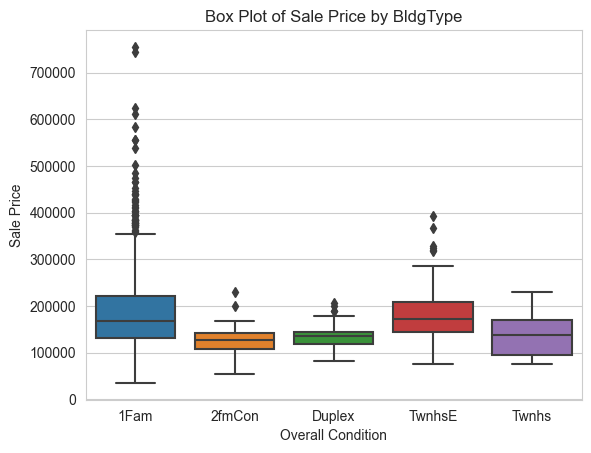

In [181]:
sns.boxplot(x=train_df['BldgType'], y=train_df['SalePrice'])
plt.xlabel('Overall Condition')
plt.ylabel('Sale Price')
plt.title('Box Plot of Sale Price by BldgType')
plt.show()

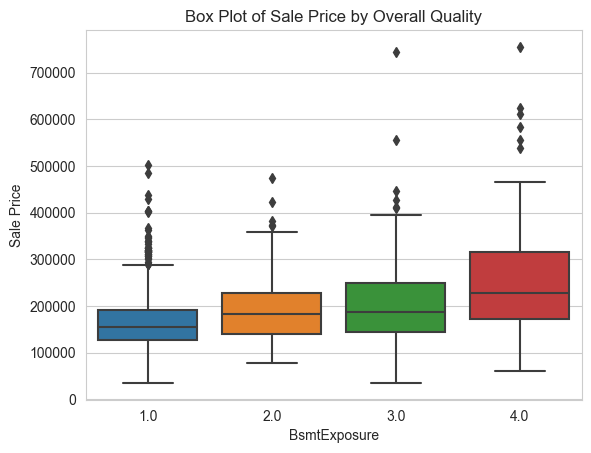

In [188]:
sns.boxplot(x=train_df['BsmtExposure'], y=train_df['SalePrice'])
plt.xlabel('BsmtExposure')
plt.ylabel('Sale Price')
plt.title('Box Plot of Sale Price by Overall Quality')
plt.show()

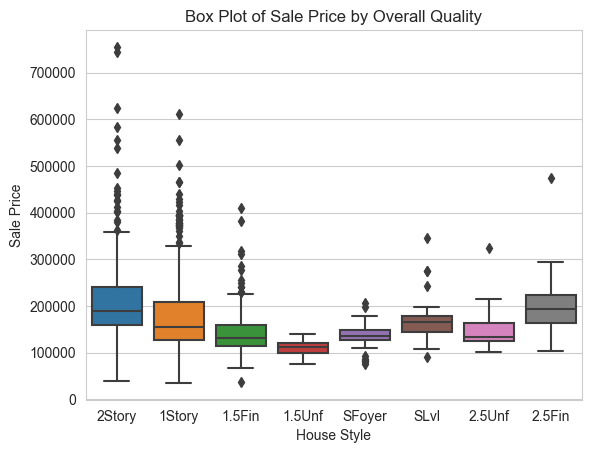

In [165]:
sns.boxplot(x=train_df['HouseStyle'], y=train_df['SalePrice'])
plt.xlabel('House Style')
plt.ylabel('Sale Price')
plt.title('Box Plot of Sale Price by Overall Quality')
plt.show()

Exterior Features:

In [128]:

# RoofStyle: Type of roof

# Flat	Flat
# Gable	Gable
# Gambrel	Gabrel (Barn)
# Hip	Hip
# Mansard	Mansard
# Shed	Shed
train_df["RoofStyle"].value_counts()

# Gable,1141
# Hip,286
# Flat,13
# Gambrel,11
# Mansard,7
# Shed,2

# RoofMatl: Roof material
train_df["RoofMatl"].value_counts()

# ClyTile	Clay or Tile
# CompShg	Standard (Composite) Shingle
# Membran	Membrane
# Metal	Metal
# Roll	Roll
# Tar&Grv	Gravel & Tar
# WdShake	Wood Shakes
# WdShngl	Wood Shingles

# CompShg,1434
# Tar&Grv,11
# WdShngl,6
# WdShake,5
# Metal,1
# Membran,1
# Roll,1
# ClyTile,1

# Exterior1st: Exterior covering on house
train_df["Exterior1st"].value_counts()

# AsbShng	Asbestos Shingles
# AsphShn	Asphalt Shingles
# BrkComm	Brick Common
# BrkFace	Brick Face
# CBlock	Cinder Block
# CemntBd	Cement Board
# HdBoard	Hard Board
# ImStucc	Imitation Stucco
# MetalSd	Metal Siding
# Other	Other
# Plywood	Plywood
# PreCast	PreCast
# Stone	Stone
# Stucco	Stucco
# VinylSd	Vinyl Siding
# Wd Sdng	Wood Siding
# WdShing	Wood Shingles

# VinylSd,515
# HdBoard,222
# MetalSd,220
# Wd Sdng,206
# Plywood,108
# CemntBd,61
# BrkFace,50
# WdShing,26
# Stucco,25
# AsbShng,20


# Exterior2nd: Exterior covering on house (if more than one material)
train_df["Exterior2nd"].value_counts()

# AsbShng	Asbestos Shingles
# AsphShn	Asphalt Shingles
# BrkComm	Brick Common
# BrkFace	Brick Face
# CBlock	Cinder Block
# CemntBd	Cement Board
# HdBoard	Hard Board
# ImStucc	Imitation Stucco
# MetalSd	Metal Siding
# Other	Other
# Plywood	Plywood
# PreCast	PreCast
# Stone	Stone
# Stucco	Stucco
# VinylSd	Vinyl Siding
# Wd Sdng	Wood Siding
# WdShing	Wood Shingles
# MasVnrType: Masonry veneer type
# BrkCmn	Brick Common
# BrkFace	Brick Face
# CBlock	Cinder Block
# None	None
# Stone	Stone
# VinylSd,504
# MetalSd,214
# HdBoard,207
# Wd Sdng,197
# Plywood,142
# CmentBd,60
# Wd Shng,38
# Stucco,26
# BrkFace,25
# AsbShng,20

# MasVnrArea: Masonry veneer area in square feet


# ExterQual: Evaluates the quality of the material on the exterior

train_df["ExterQual"].value_counts()

# Ex	Excellent
# Gd	Good
# TA	Average/Typical
# Fa	Fair
# Po	Poor

# TA,906
# Gd,488
# Ex,52
# Fa,14

# ExterCond: Evaluates the present condition of the material on the exterior

train_df["ExterCond"].value_counts()

# Ex	Excellent
# Gd	Good
# TA	Average/Typical
# Fa	Fair
# Po	Poor

# TA,1282
# Gd,146
# Fa,28
# Ex,3
# Po,1

# Foundation: Type of foundation

train_df["Foundation"].value_counts()

# BrkTil	Brick & Tile
# CBlock	Cinder Block
# PConc	Poured Contrete
# Slab	Slab
# Stone	Stone
# Wood	Wood

# PConc,647
# CBlock,634
# BrkTil,146
# Slab,24
# Stone,6
# Wood,3



Foundation
PConc     647
CBlock    634
BrkTil    146
Slab       24
Stone       6
Wood        3
Name: count, dtype: int64

In [131]:
# HeatingQC: Heating quality and condition
train_df["HeatingQC"].value_counts()

    #   Ex	Excellent
    #   Gd	Good
    #   TA	Average/Typical
    #   Fa	Fair
    #   Po	Poor

# Ex,741
# TA,428
# Gd,241
# Fa,49
# Po,1

# CentralAir: Central air conditioning
train_df["CentralAir"].value_counts()

    #   N	No
    #   Y	Yes

# Y,1365
# N,95

# Electrical: Electrical system
train_df["Electrical"].value_counts()

       # SBrkr	Standard Circuit Breakers & Romex
       # FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)
       # FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)
       # FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)
       # Mix	Mixed

# SBrkr,1334
# FuseA,94
# FuseF,27
# FuseP,3
# Mix,1



Electrical
SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: count, dtype: int64

Area

In [137]:
# 1stFlrSF: First Floor square feet
train_df["1stFlrSF"].value_counts()

# 2ndFlrSF: Second floor square feet
#train_df["2ndFlrSF"].value_counts()
# 0,829
# 728,10
# 504,9
# 546,8
# 672,8
# 600,7
# 720,7
# 896,6
# 862,5
# 780,5

# LowQualFinSF: Low quality finished square feet (all floors)
#train_df["LowQualFinSF"].value_counts()
# 0,1434
# 80,3
# 360,2
# 205,1
# 479,1
# 397,1
# 514,1
# 120,1
# 481,1
# 232,1

# GrLivArea: Above grade (ground) living area square feet
# train_df["GrLivArea"].value_counts()


1stFlrSF
864     25
1040    16
912     14
894     12
848     12
672     11
630      9
816      9
483      7
960      7
936      7
832      7
840      6
1056     6
764      6
728      6
990      6
720      6
882      6
1728     6
1120     5
616      5
768      5
1088     5
804      5
1026     5
698      5
858      5
1422     5
780      5
        ..
806      1
899      1
1801     1
1218     1
1717     1
989      1
1521     1
2042     1
1429     1
703      1
877      1
576      1
846      1
1389     1
1557     1
897      1
915      1
1244     1
1377     1
664      1
767      1
1838     1
1159     1
334      1
751      1
1509     1
2515     1
605      1
3138     1
1256     1
Name: count, Length: 753, dtype: int64

In [192]:
sns.boxplot(x=train_df['MSSUbCLass'], y=train_df['SalePrice'])
plt.xlabel('House Style')
plt.ylabel('Sale Price')
plt.title('Box Plot of Sale Price by Overall Quality')
plt.show()

KeyError: 'MSSUbCLass'

In [ ]:
varModel=VarianceThreshold(threshold=0) #Setting variance threshold to 0 which means features that have same value in all samples.
varModel.fit(X_train)

Bath Features

In [155]:
# BsmtFullBath: Basement full bathrooms
train_df["BsmtFullBath"].value_counts()
# 0,856
# 1,588
# 2,15
# 3,1

# BsmtHalfBath: Basement half bathrooms
train_df["BsmtHalfBath"].value_counts()
# 0,1378
# 1,80
# 2,2

# FullBath: Full bathrooms above grade
train_df["FullBath"].value_counts()
# 2,768
# 1,650
# 3,33
# 0,9

# HalfBath: Half baths above grade
train_df["HalfBath"].value_counts()
# 0,913
# 1,535
# 2,12

# Bedroom: Bedrooms above grade (does NOT include basement bedrooms)
train_df["BedroomAbvGr"].value_counts()

# 3,804
# 2,358
# 4,213
# 1,50
# 5,21
# 6,7
# 0,6
# 8,1

# Kitchen: Kitchens above grade

train_df["KitchenAbvGr"].value_counts()

# 1,1392
# 2,65
# 3,2
# 0,1

# KitchenQual: Kitchen quality

train_df["KitchenQual"].value_counts()

# Ex	Excellent
# Gd	Good
# TA	Typical/Average
# Fa	Fair
# Po	Poor

# TA,735
# Gd,586
# Ex,100
# Fa,39

# TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

train_df["TotRmsAbvGrd"].value_counts()

# 6,402
# 7,329
# 5,275
# 8,187
# 4,97
# 9,75
# 10,47
# 11,18
# 3,17
# 12,11
# 2,1


TotRmsAbvGrd
6     402
7     329
5     275
8     187
4      97
9      75
10     47
11     18
3      17
12     11
2       1
14      1
Name: count, dtype: int64

In [191]:
sns.boxplot(x=train_df['MSSUbCLass'], y=train_df['SalePrice'])
plt.xlabel('Total Rooms Above Ground')
plt.ylabel('Sale Price')
plt.title('Box Plot of Sale Price by Total Rooms Above Ground')
plt.show()

KeyError: 'MSSubCLass'

Pool Features

In [161]:
# PoolArea: Pool area in square feet

# PoolQC: Pool quality

# Ex	Excellent
# Gd	Good
# TA	Average/Typical
# Fa	Fair
# NA	No Pool

train_df["PoolArea"].value_counts()

# 0,1453
# 512,1
# 648,1
# 576,1
# 555,1
# 480,1
# 519,1
# 738,1

train_df["PoolQC"].value_counts()

# Gd,3
# Ex,2
# Fa,2

# Fence: Fence quality

# GdPrv	Good Privacy
# MnPrv	Minimum Privacy
# GdWo	Good Wood
# MnWw	Minimum Wood/Wire
# NA	No Fence

train_df["Fence"].value_counts()

# MnPrv,157
# dPrv,59
# GdWo,54
# MnWw,11

train_df["SaleCondition"].value_counts()

# Normal,1198
# Partial,125
# Abnorml,101
# Family,20
# Alloca,12
# AdjLand,4




SaleCondition
Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: count, dtype: int64

In [47]:
# find null values count for each feature

# next I'll check for missing values in training data
pd.options.display.min_rows = 115
null_counts = train_df.isnull().sum().sort_values(ascending=False);
counts = null_counts.to_dict()
# keep only the fields with at least 1 null value
counts = dict(filter(lambda a: a[1] > 0, counts.items()))
features_with_missing_values = list(counts.keys())
features_with_missing_values

['PoolQC',
 'MiscFeature',
 'Alley',
 'Fence',
 'MasVnrType',
 'FireplaceQu',
 'LotFrontage',
 'GarageYrBlt',
 'GarageCond',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'BsmtFinType2',
 'BsmtExposure',
 'BsmtQual',
 'BsmtCond',
 'BsmtFinType1',
 'MasVnrArea',
 'Electrical']

In [48]:
# resplace the missing values
# numberic values will be replaced with 0
values = {
    "PoolQC": "No Pool",
    "MiscFeature": "No Feature",
    "Alley": "No alley access",
    "Fence": "No Fence",
    "FireplaceQu": "No Fireplace",
    "GarageCond": "No Garage",
    "GarageType": "No Garage",
    "GarageArea": 0,
    "GarageYrBlt": "None built",
    "GarageFinish": "No Garage",
    "GarageQual": "No Garage",
    "BsmtExposure": "No Basement",
    "BsmtFinType2": "Not Applicable",
    "BsmtFinType1": "Not Applicable",
    "BsmtCond": "No Basement",
    "BsmtQual": "No Basement",
    "MasVnrArea": 0,
    "MasVnrType": "No Veneer",
    "LotFrontage": 0,
    "Electrical" : "NA"
}

train_df.fillna(value=values, inplace=True)
test_df.fillna(value=values, inplace=True)


In [49]:
null_counts = train_df.isnull().sum().sort_values(ascending=False);
null_counts

Id               0
CentralAir       0
GarageYrBlt      0
GarageType       0
FireplaceQu      0
Fireplaces       0
Functional       0
TotRmsAbvGrd     0
KitchenQual      0
KitchenAbvGr     0
BedroomAbvGr     0
HalfBath         0
FullBath         0
BsmtHalfBath     0
BsmtFullBath     0
GrLivArea        0
LowQualFinSF     0
2ndFlrSF         0
1stFlrSF         0
GarageFinish     0
GarageCars       0
GarageArea       0
PoolQC           0
SaleCondition    0
SaleType         0
YrSold           0
MoSold           0
MiscVal          0
MiscFeature      0
Fence            0
                ..
LotConfig        0
Utilities        0
LandContour      0
LotShape         0
Alley            0
Street           0
LotArea          0
LotFrontage      0
MSZoning         0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
BsmtCond         0
TotalBsmtSF      0
BsmtUnfSF        0
BsmtFinSF2       0
BsmtFinType2     0
BsmtFinSF1       0
BsmtFinType1     0
BsmtExposure     0
BsmtQual         0
RoofMatl    

In [50]:
train_df.isna().sum().sort_values(ascending=False)


Id               0
CentralAir       0
GarageYrBlt      0
GarageType       0
FireplaceQu      0
Fireplaces       0
Functional       0
TotRmsAbvGrd     0
KitchenQual      0
KitchenAbvGr     0
BedroomAbvGr     0
HalfBath         0
FullBath         0
BsmtHalfBath     0
BsmtFullBath     0
GrLivArea        0
LowQualFinSF     0
2ndFlrSF         0
1stFlrSF         0
GarageFinish     0
GarageCars       0
GarageArea       0
PoolQC           0
SaleCondition    0
SaleType         0
YrSold           0
MoSold           0
MiscVal          0
MiscFeature      0
Fence            0
                ..
LotConfig        0
Utilities        0
LandContour      0
LotShape         0
Alley            0
Street           0
LotArea          0
LotFrontage      0
MSZoning         0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
BsmtCond         0
TotalBsmtSF      0
BsmtUnfSF        0
BsmtFinSF2       0
BsmtFinType2     0
BsmtFinSF1       0
BsmtFinType1     0
BsmtExposure     0
BsmtQual         0
RoofMatl    

In [51]:
# we should convert date to string as they don't reflect

train_df.YearBuilt = train_df.YearBuilt.astype(str)
test_df.YearBuilt = test_df.YearBuilt.astype(str)

train_df.YrSold = train_df.YrSold.astype(str)
test_df.YrSold = test_df.YrSold.astype(str)

train_df.GarageYrBlt = train_df.GarageYrBlt.astype(str)
test_df.GarageYrBlt = test_df.GarageYrBlt.astype(str)

train_df.YearRemodAdd = train_df.YearRemodAdd.astype(str)
test_df.YearRemodAdd = test_df.YearRemodAdd.astype(str)



In [52]:
# convert numerical catergory to string to avoid mix up
# MSSUbCLass, Overallcond & OverallQual: we will decode this to avoid numeric mix-up
MSSUbCLass = {
    20: "1-STORY 1946 & NEWER ALL STYLES",
    30: "1-STORY 1945 & OLDER",
    40: "1-STORY W/FINISHED ATTIC ALL AGES",
    45: "1-1/2 STORY - UNFINISHED ALL AGES",
    50: "1-1/2 STORY FINISHED ALL AGES",
    60: "2-STORY 1946 & NEWER",
    70: "2-STORY 1945 & OLDER",
    75: "2-1/2 STORY ALL AGES",
    80: "SPLIT OR MULTI-LEVEL",
    85: "SPLIT FOYER",
    90: "DUPLEX - ALL STYLES AND AGES",
    120: "1-STORY PUD (Planned Unit Development) - 1946 & NEWER",
    150: "1-1/2 STORY PUD - ALL AGES",
    160: "2-STORY PUD - 1946 & NEWER",
    180: "PUD - MULTILEVEL - INCL SPLIT LEV/FOYER",
    190: "2 FAMILY CONVERSION - ALL STYLES AND AGES",
}


OverallQualCond = {
    10: "Very Excellent",
    9: "Excellent",
    8: "Very Good",
    7: "Good",
    6: "Above Average",
    5: "Average",
    4: "Below Average",
    3: "Fair",
    2: "Poor",
    1: "Very Poor",
}

train_df.replace(
    {
        "OverallQual": OverallQualCond,
        "OverallCond": OverallQualCond,
        "MSSubClass": MSSUbCLass,
    },
    inplace=True,
)
test_df.replace(
    {
        "OverallQual": OverallQualCond,
        "OverallCond": OverallQualCond,
        "MSSubClass": MSSUbCLass,
    },
    inplace=True,
)


print("test data shape", test_df.shape, "train data shape", train_df.shape)

test data shape (1459, 80) train data shape (1460, 81)


/var/folders/68/xk2k5fn927d069w9f4t5gd0c0000gq/T/ipykernel_40568/4270500579.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x)


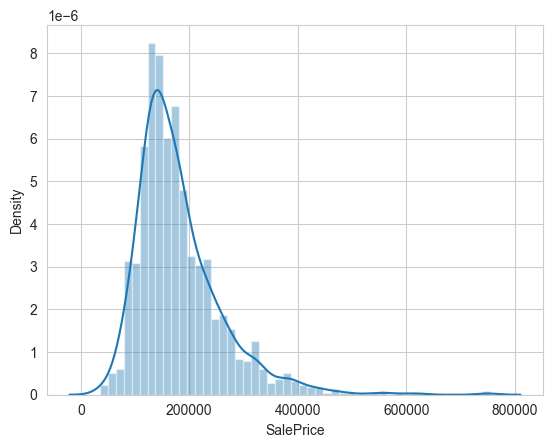

/var/folders/68/xk2k5fn927d069w9f4t5gd0c0000gq/T/ipykernel_40568/4270500579.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x)


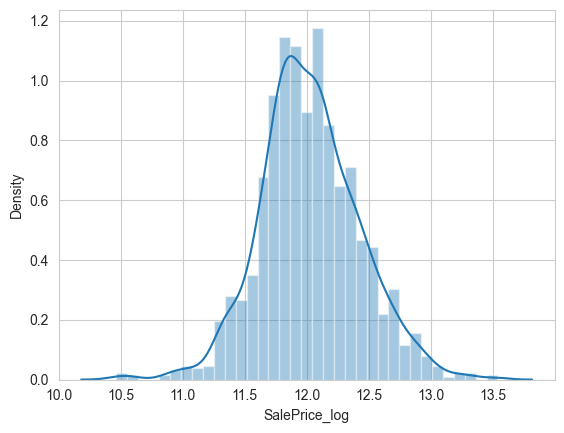

In [53]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

x = train_df.SalePrice
sns.set_style("whitegrid")
sns.distplot(x)
plt.show()

train_df["SalePrice_log"] = np.log(train_df.SalePrice)
x = train_df.SalePrice_log
sns.distplot(x)
plt.show()

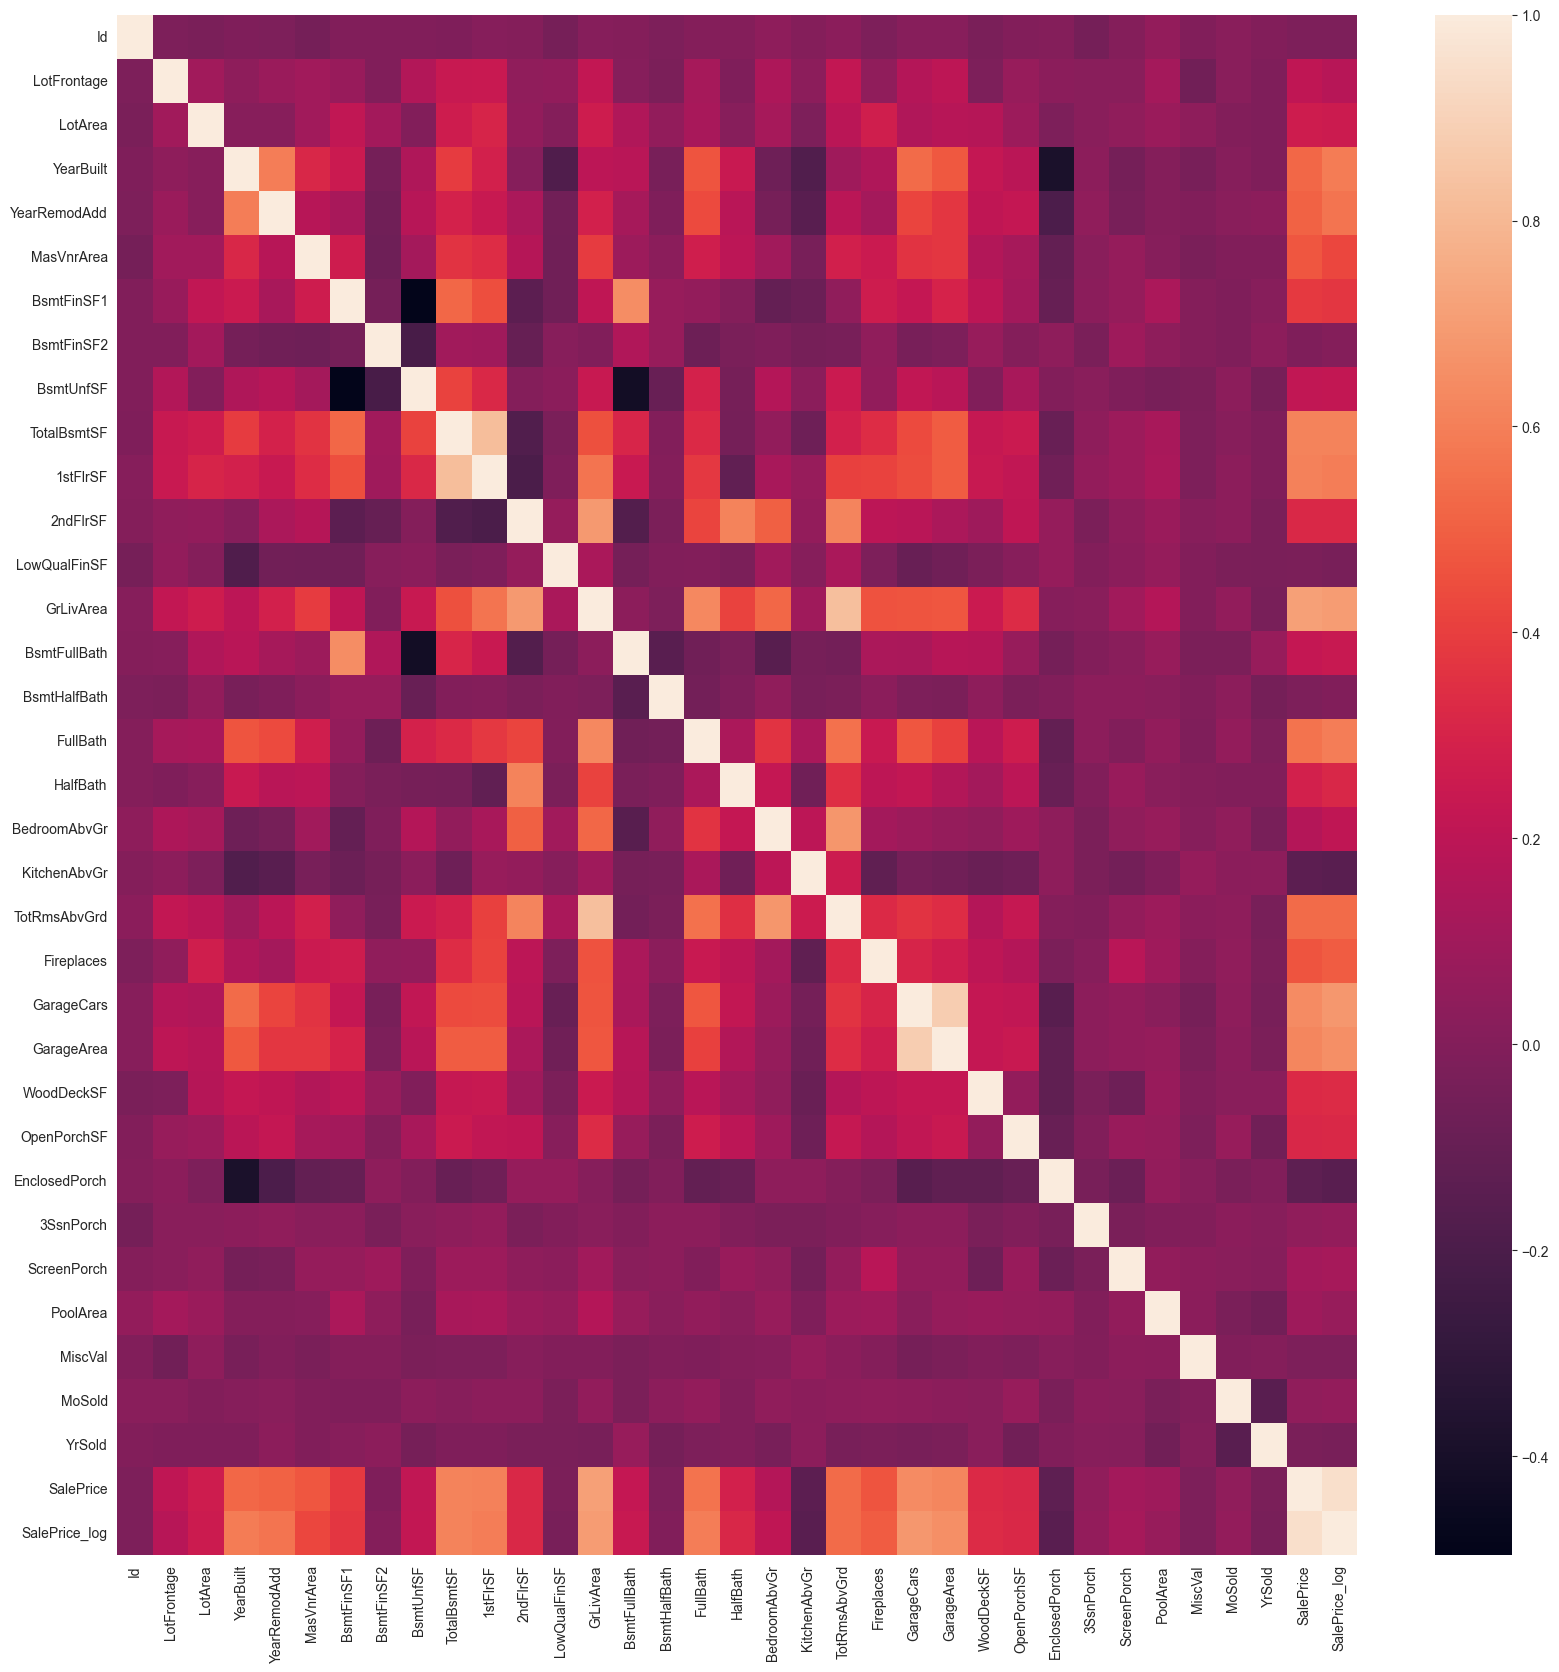

In [38]:
train_df = train_df.select_dtypes(include = ['float64', 'int64'])
train_df.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(train_df.corr())
plt.savefig("pearsonsmep.png")

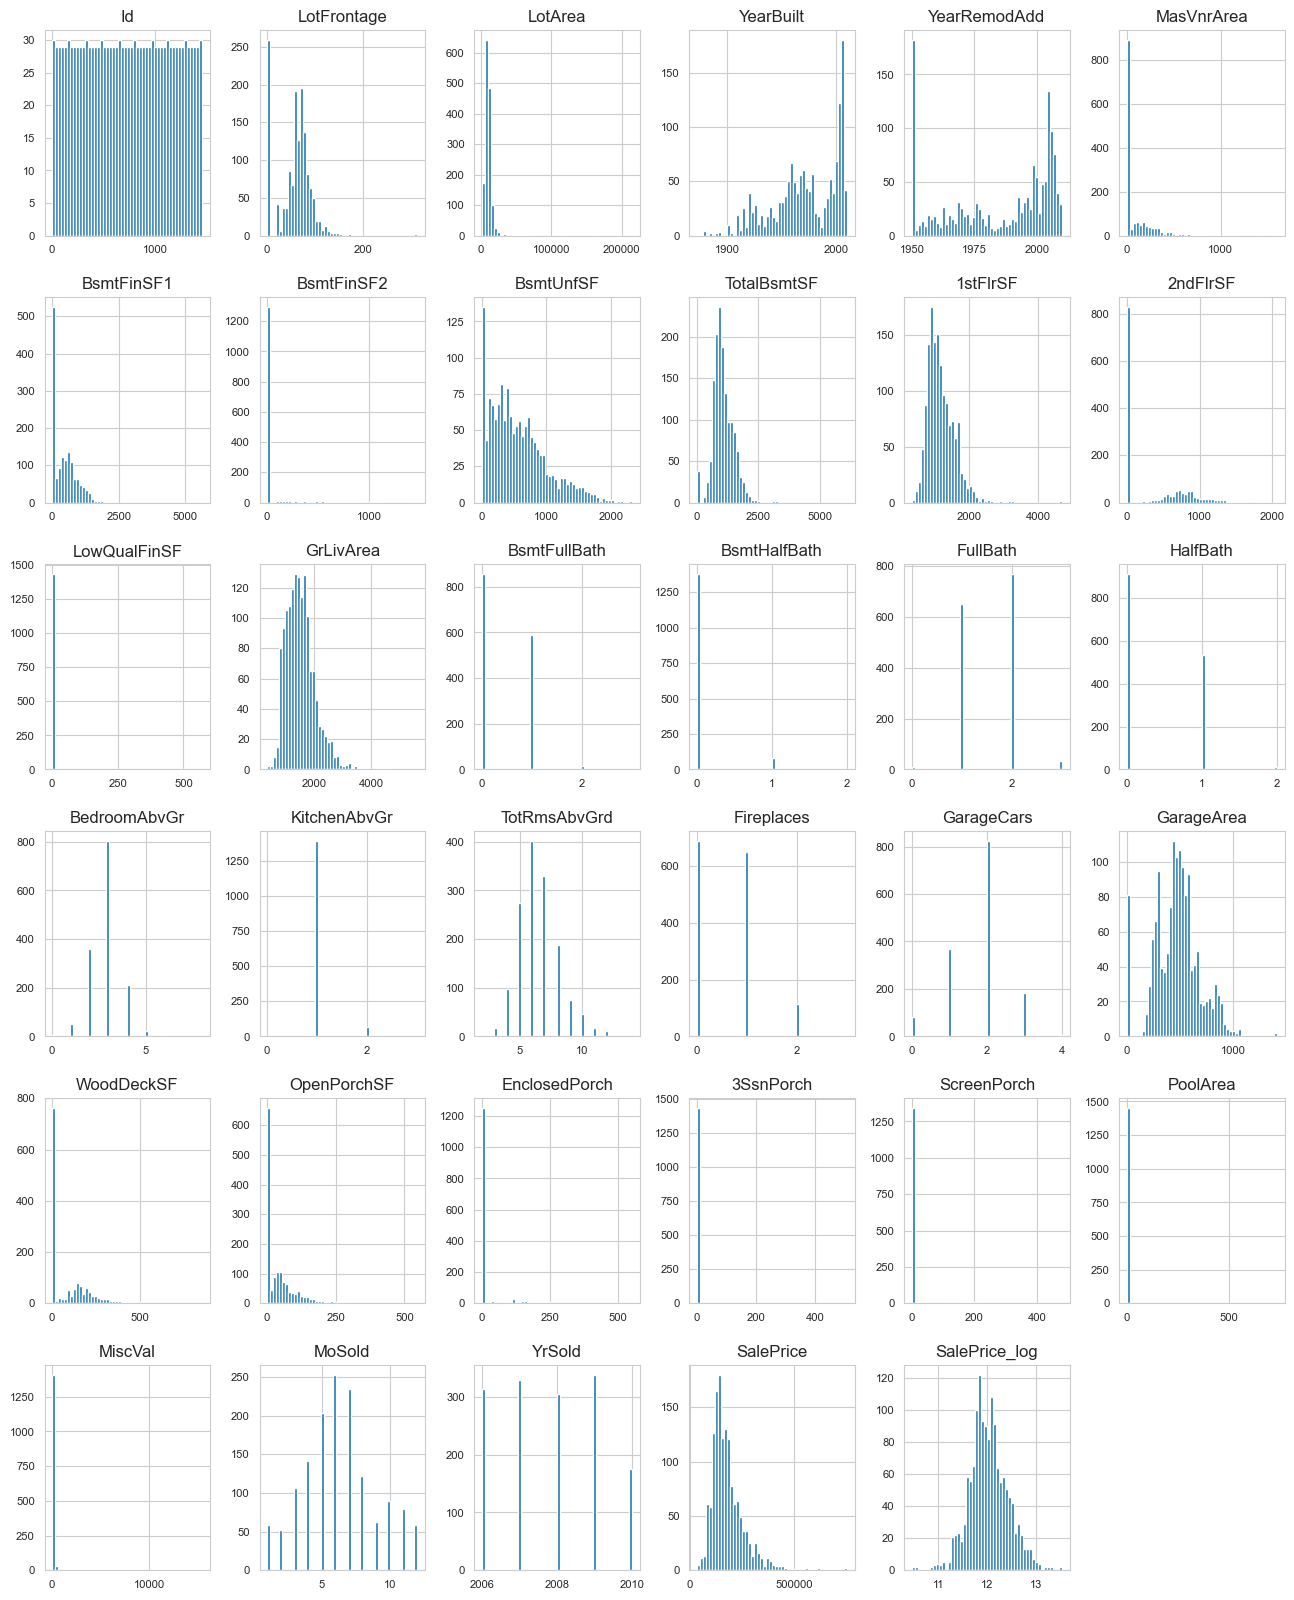

In [34]:
train_df.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);


In [54]:
# encoding categorical data

# Convert training and test data to one hot encoded numeric data
import sklearn
from sklearn.preprocessing import OneHotEncoder as SklearnOneHotEncoder

# Wrapper for one hot encoder to allow labelling of encoded variables
class OneHotEncoder(SklearnOneHotEncoder):
    def __init__(self, **kwargs):
        super(OneHotEncoder, self).__init__(**kwargs)
        self.fit_flag = False

    def fit(self, X, **kwargs):
        out = super().fit(X)
        self.fit_flag = True
        return out

    def transform(self, X, **kwargs):
        sparse_matrix = super(OneHotEncoder, self).transform(X)
        new_columns = self.get_new_columns(X=X)
        d_out = pd.DataFrame(
            sparse_matrix.toarray(), columns=new_columns, index=X.index
        )
        return d_out

    def fit_transform(self, X, **kwargs):
        self.fit(X)
        return self.transform(X)

    def get_new_columns(self, X):
        new_columns = []
        for i, column in enumerate(X.columns):
            j = 0
            while j < len(self.categories_[i]):
                new_columns.append(f"{column}_<{self.categories_[i][j]}>")
                j += 1
        return new_columns


def transform(Train, df):

    # isolate categorical features
    cat_columns = df.select_dtypes(include=["object"]).columns
    cat_df = df[cat_columns]

    # isolate the numeric features
    numeric_df = df.select_dtypes(include=np.number)

    # initialise one hot encoder object spcify handle unknown and auto options to keep test and train same size
    ohe = OneHotEncoder(categories="auto", handle_unknown="ignore")
    # Fit the endcoder to training data
    ohe.fit(Train[cat_columns])

    # transform input data
    df_processed = ohe.transform(cat_df)

    # concatinate numeric features from orginal tables with encoded features
    df_processed_full = pd.concat([df_processed, numeric_df], axis=1)

    return df_processed_full


# Transform training data to numeric form
Train_encoded = transform(train_df, train_df)
# Transform test data to numeric form
#Test_encoded = transform(test_df, test_df)

# Check data sets are same width minus the two labels in Train
#print("Test", Test_encoded.shape, "Train", Train_encoded.shape)

Train_encoded

,MSSubClass_<1-1/2 STORY - UNFINISHED ALL AGES>,MSSubClass_<1-1/2 STORY FINISHED ALL AGES>,MSSubClass_<1-STORY 1945 & OLDER>,MSSubClass_<1-STORY 1946 & NEWER ALL STYLES>,MSSubClass_<1-STORY PUD (Planned Unit Development) - 1946 & NEWER>,MSSubClass_<1-STORY W/FINISHED ATTIC ALL AGES>,MSSubClass_<2 FAMILY CONVERSION - ALL STYLES AND AGES>,MSSubClass_<2-1/2 STORY ALL AGES>,MSSubClass_<2-STORY 1945 & OLDER>,MSSubClass_<2-STORY 1946 & NEWER>,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,SalePrice_log
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0,61,0,0,0,0,0,2,208500,12.247694
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,298,0,0,0,0,0,0,5,181500,12.109011
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0,42,0,0,0,0,0,9,223500,12.317167
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,35,272,0,0,0,0,2,140000,11.849398
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,192,84,0,0,0,0,0,12,250000,12.429216
5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,40,30,0,320,0,0,700,10,143000,11.870600
6,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,255,57,0,0,0,0,0,8,307000,12.634603
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,235,204,228,0,0,0,350,11,200000,12.206073
8,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,90,0,205,0,0,0,0,4,129900,11.774520
9,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0,4,0,0,0,0,0,1,118000,11.678440
